In [299]:
import pandas as pd
import numpy as np
from scipy import integrate, optimize

import seaborn as sns
import matplotlib.pyplot as plt

In [300]:

newly_confirmed_cases_daily = pd.read_csv('/Users/mac/Desktop/epidemology/newly_confirmed_cases_daily.csv')


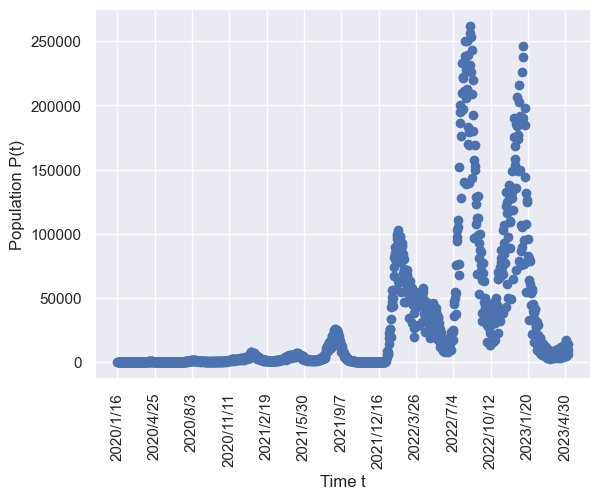

In [301]:
plt.xlabel("Time t")
plt.ylabel("Population P(t)")

plt.plot(newly_confirmed_cases_daily['Date'].tolist(), newly_confirmed_cases_daily['ALL'].tolist(), 'o')
plt.xticks(newly_confirmed_cases_daily['Date'][::100],  rotation='vertical')
plt.show()

In [302]:
dates = newly_confirmed_cases_daily['Date'].tolist()
date2idx = {date:i for i,date in enumerate(dates)} 
start = date2idx["2020/2/1"]
emergency_start = date2idx["2020/4/7"]
emergency_stop = date2idx["2020/5/25"]
end = date2idx["2020/6/30"]

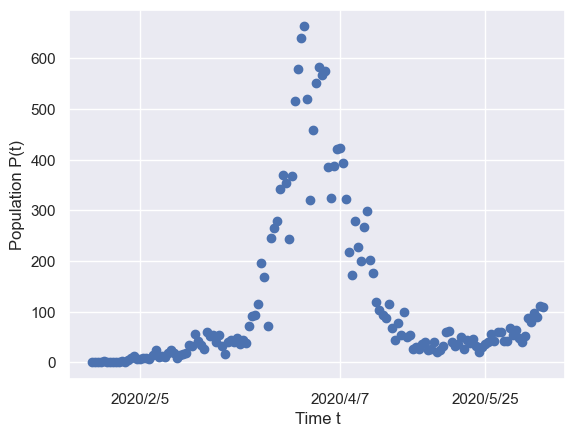

In [303]:
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks([start,emergency_start,emergency_stop,end], ["2020/2/5","2020/4/7","2020/5/25","2020/6/30"])
plt.plot(newly_confirmed_cases_daily['Date'][start:end], newly_confirmed_cases_daily['ALL'][start:end], 'o')

In [304]:
def sir_model(y, t, beta, gamma):
    dS = -beta*y[0]*y[1]/N
    dI =  beta*y[0]*y[1]/N - gamma*y[1]
    dR =  gamma*y[1]
    return [dS, dI, dR]

# Define the parameters
def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

# Initial values 
N = 125800000.0 # Population of Japan
I0 = newly_confirmed_cases_daily['ALL'].tolist()[0]
S0 = N - I0
R0 = 0.0

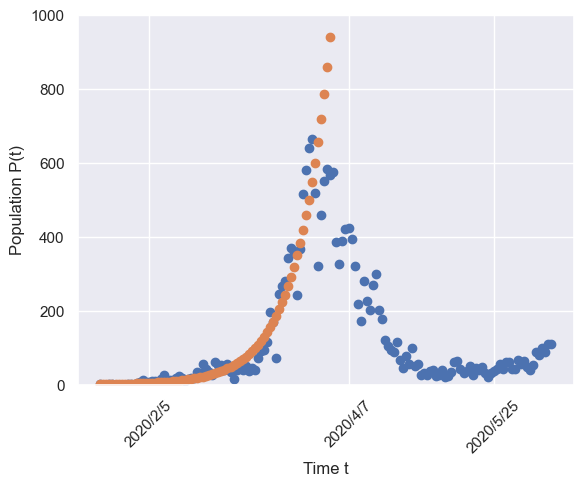

In [305]:
popt, pcov = optimize.curve_fit(fit_odeint, list(range(0,len(newly_confirmed_cases_daily['Date'][start:emergency_start]))),\
                                newly_confirmed_cases_daily['ALL'][start:emergency_start])


fitted = fit_odeint(list(range(0,len(newly_confirmed_cases_daily['Date'][start:end]))), *popt)
sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)
plt.xticks([start,emergency_start,emergency_stop,end], ["2020/2/5","2020/4/7","2020/5/25","2020/6/30"])

plt.plot(list(range(0,len(newly_confirmed_cases_daily['Date'][start:end]))), newly_confirmed_cases_daily['ALL'][start:end], 'o')
plt.plot(list(range(0,len(newly_confirmed_cases_daily['Date'][start:end]))), fitted, 'o')
plt.ylim(0,1000)


plt.show()

In [306]:
dates_n = [i for i,_ in enumerate(newly_confirmed_cases_daily['Date'].tolist())] 

# here is to show the difference of sir , seir ,seirq model

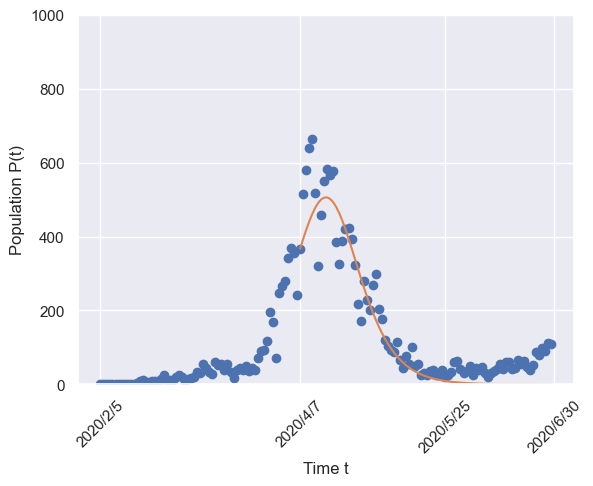

0.8651590020313282

In [307]:
from sklearn.metrics import r2_score

N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0]
S0 = N - I0
R0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start:end], newly_confirmed_cases_daily['ALL'][emergency_start:end])
fitted = fit_odeint(dates_n[emergency_start:end], *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)
plt.xticks([start,emergency_start,emergency_stop,end], ["2020/2/5","2020/4/7","2020/5/25","2020/6/30"])

plt.plot(dates_n[start:end], newly_confirmed_cases_daily['ALL'][start:end], 'o')
plt.plot(dates_n[emergency_start:end], fitted)
plt.ylim(0,1000)


plt.show()

r2_score(newly_confirmed_cases_daily['ALL'][emergency_start:end], fitted)


In [308]:
def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2):
    dS = -(beta1 * y[1] + beta2 * y[2]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    return [dS, dE, dI, dR]
def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2):
    return integrate.odeint(seir_model, (S0, E0, I0, R0), x, args=(beta1, beta2, sigma, gamma1, gamma2))[:, 2]


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



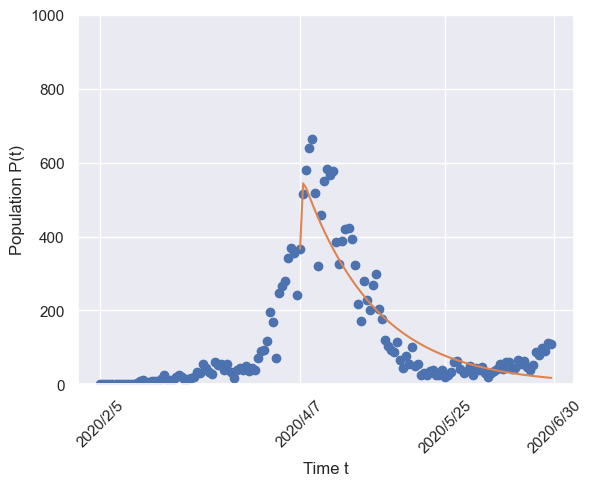

0.8527148639512284

In [309]:

N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0]
S0 = N - I0
R0 = 0.0
E0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start:end], newly_confirmed_cases_daily['ALL'][emergency_start:end])
fitted = fit_odeint(dates_n[emergency_start:end], *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)
plt.xticks([start,emergency_start,emergency_stop,end], ["2020/2/5","2020/4/7","2020/5/25","2020/6/30"])

plt.plot(dates_n[start:end], newly_confirmed_cases_daily['ALL'][start:end], 'o')
plt.plot(dates_n[emergency_start:end], fitted)
plt.ylim(0,1000)

plt.show()

r2_score(newly_confirmed_cases_daily['ALL'][emergency_start:end], fitted)


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



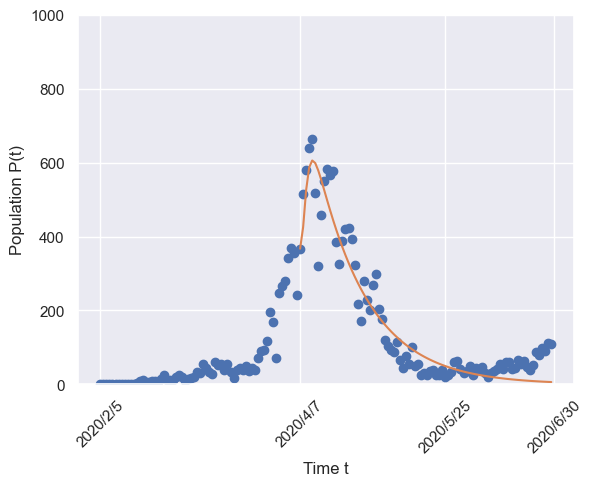

0.8940979662016063

In [310]:
# with quarantine rate 
def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2, qua_rate):
    dS = -(beta1 * y[1] + beta2 * y[2] + y[4]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    dQ = qua_rate * y[0]
    return [dS, dE, dI, dR , dQ]
def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2,qua_rate):
    return integrate.odeint(seir_model, (S0, E0, I0, R0, Q0), x, args=(beta1, beta2, sigma, gamma1, gamma2,qua_rate))[:, 2]


N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0]
Q0 = 0.0
S0 = N - I0 - Q0
R0 = 0.0
E0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start:end], newly_confirmed_cases_daily['ALL'][emergency_start:end])
fitted = fit_odeint(dates_n[emergency_start:end], *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)
plt.xticks([start,emergency_start,emergency_stop,end], ["2020/2/5","2020/4/7","2020/5/25","2020/6/30"])

plt.plot(dates_n[start:end], newly_confirmed_cases_daily['ALL'][start:end], 'o')
plt.plot(dates_n[emergency_start:end], fitted)
plt.ylim(0,1000)

plt.show()
r2_score(newly_confirmed_cases_daily['ALL'][emergency_start:end], fitted)



In [311]:
original = popt[5]
original

1.463778113581143

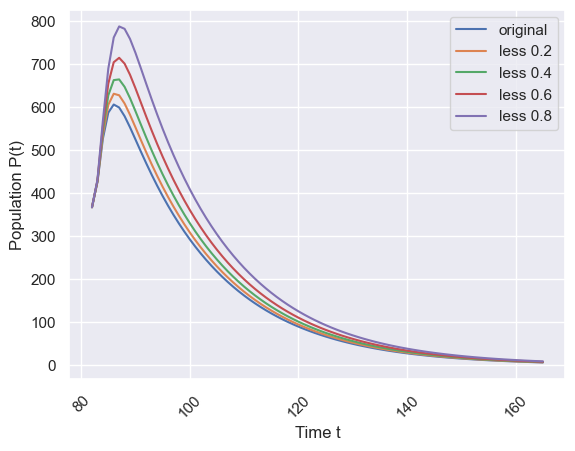

In [312]:
# quarantine rate = 1.46377811
#to examine if reduction of quarantine rate could lead to difference

popt[5] = original - 0.2
fitted1 = fit_odeint(dates_n[emergency_start:end], *popt)

popt[5] = original - 0.2- 0.2
fitted2 = fit_odeint(dates_n[emergency_start:end], *popt)


popt[5] = original - 0.2- 0.2- 0.2
fitted3 = fit_odeint(dates_n[emergency_start:end], *popt)


popt[5] = original - 0.2- 0.2- 0.2- 0.2
fitted4 = fit_odeint(dates_n[emergency_start:end], *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)


plt.plot(dates_n[emergency_start:end], fitted,label = 'original')
plt.plot(dates_n[emergency_start:end], fitted1,label = 'less 0.2')
plt.plot(dates_n[emergency_start:end], fitted2,label = 'less 0.4')
plt.plot(dates_n[emergency_start:end], fitted3,label = 'less 0.6')
plt.plot(dates_n[emergency_start:end], fitted4,label = 'less 0.8')

plt.legend()

plt.show()


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



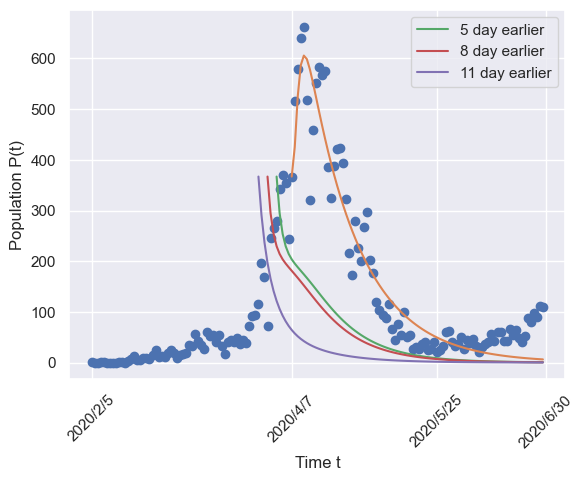

In [313]:
# to examine the difference if lockdown was in measurement earlier

def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2, qua_rate):
    dS = -(beta1 * y[1] + beta2 * y[2] + y[4]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    dQ = qua_rate * y[0]
    return [dS, dE, dI, dR , dQ]
def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2,qua_rate):
    return integrate.odeint(seir_model, (S0, E0, I0, R0, Q0), x, args=(beta1, beta2, sigma, gamma1, gamma2,qua_rate))[:, 2]


N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0]
Q0 = 0.0
S0 = N - I0 - Q0
R0 = 0.0
E0 = 0.0

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)
plt.xticks([start,emergency_start,emergency_stop,end], ["2020/2/5","2020/4/7","2020/5/25","2020/6/30"])

plt.plot(dates_n[start:end], newly_confirmed_cases_daily['ALL'][start:end], 'o')

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start:end], newly_confirmed_cases_daily['ALL'][emergency_start:end])
fitted = fit_odeint(dates_n[emergency_start:end], *popt)
plt.plot(dates_n[emergency_start:end], fitted)

# becasue it is lockdown , so i used same rate (susceptible to exposed) and (susceptible to infected)

beta1, beta2 = popt[0],popt[1]

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start-8:end], newly_confirmed_cases_daily['ALL'][emergency_start-8:end])
popt[0],popt[1] = beta1, beta2
fitted = fit_odeint(dates_n[emergency_start-5:end], *popt)
plt.plot(dates_n[emergency_start-5:end], fitted,label='5 day earlier')

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start-8:end], newly_confirmed_cases_daily['ALL'][emergency_start-8:end])
popt[0],popt[1] = beta1, beta2
fitted = fit_odeint(dates_n[emergency_start-8:end], *popt)
plt.plot(dates_n[emergency_start-8:end], fitted,label='8 day earlier')

popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start-11:end], newly_confirmed_cases_daily['ALL'][emergency_start-11:end])
popt[0],popt[1] = beta1, beta2
fitted = fit_odeint(dates_n[emergency_start-11:end], *popt)
plt.plot(dates_n[emergency_start-11:end], fitted,label='11 day earlier')




plt.legend()
plt.show()




In [314]:
def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2):
    dS = -(beta1 * y[1] + beta2 * y[2]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    return [dS, dE, dI, dR]

N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0] / N
S0 = N - I0 - R0 - E0 / N
R0 = 0.0
E0 = 0.0 

def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2):
    return integrate.odeint(seir_model, (S0, E0, I0, R0), x, args=(beta1, beta2, sigma, gamma1, gamma2))[:, 2]
popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start:end], newly_confirmed_cases_daily['ALL'][emergency_start:end])
beta1, beta2, sigma, gamma1, gamma2 = popt
N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0] / N
S0 = N - I0 - R0 - E0 / N
R0 = 0.0
E0 = 0.0 
fitted = integrate.odeint(seir_model, (S0, E0, I0, R0) , dates_n, args = (beta1, beta2, sigma, gamma1, gamma2))
s,e,i,r = fitted.T

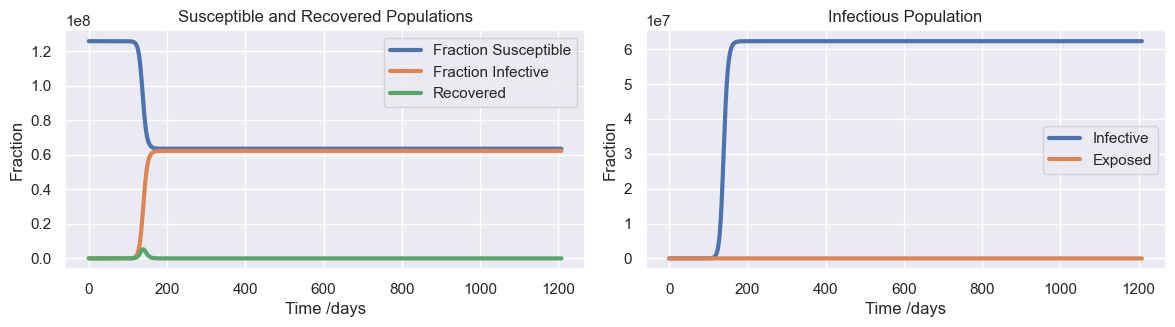

In [315]:

def plotdata(t, s, i, r, e=None):
    # Plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221), 
          fig.add_subplot(222)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    #ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')


    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()

plotdata(dates_n, s, r ,i,e)

In [316]:
popt, pcov = optimize.curve_fit(fit_odeint, dates_n[emergency_start:end], newly_confirmed_cases_daily['ALL'][emergency_start:end])
beta1, beta2, sigma, gamma1, gamma2 = popt
N = 125800000.0
I0 = newly_confirmed_cases_daily['ALL'][emergency_start:end].tolist()[0] / N
S0 = N - I0 - R0 - E0 / N
R0 = 0.0
E0 = 0.0 
fitted = integrate.odeint(seir_model, (S0, E0, I0, R0) , dates_n, args = (beta1, beta2, sigma, gamma1, gamma2))
s,e,i,r = fitted.T

Text(0.5, 1.0, 'ALL')

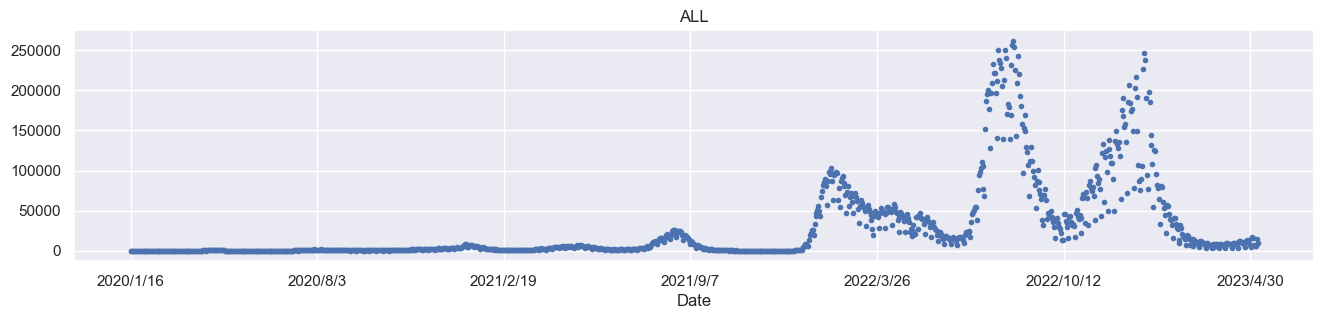

In [317]:
ax = newly_confirmed_cases_daily.set_index('Date').loc[:, 'ALL'].plot(figsize=(16, 3), style=["b."])

ax.set_title('ALL')

In [318]:
ts_raw_df = pd.read_csv("/Users/mac/Desktop/epidemology/covid_jpn_total.csv.xls", parse_dates=["Date"])
ts_raw_df

,Date,Location,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_mild,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd,Vaccinated_4th,Vaccinated_5th
0,2020-02-06,Domestic,16,132.0,16.0,0.0,0.0,NaN,9.0,0,3.0,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN
1,2020-02-06,Returnee,9,566.0,5.0,4.0,0.0,NaN,3.0,0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,2020-02-07,Domestic,16,151.0,16.0,0.0,0.0,NaN,12.0,0,0.0,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN
3,2020-02-07,Returnee,9,566.0,6.0,3.0,0.0,NaN,4.0,0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,2020-02-10,Domestic,16,174.0,16.0,0.0,0.0,NaN,7.0,0,0.0,0.0,9.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,2023-05-07,Airport,24147,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,8,0.0,0.0,0.0,NaN,NaN
3522,2023-05-07,Returnee,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,NaN,NaN
3523,2023-05-08,Domestic,33802739,NaN,NaN,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,74669,104705609.0,103380992.0,86492902.0,58570394.0,30580204.0
3524,2023-05-08,Airport,24164,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,8,0.0,0.0,0.0,NaN,NaN


In [319]:
def sum_nan(x):
    if x.isna().all():
        return np.nan
    else:
        return x.sum()

ts_df = ts_raw_df.groupby("Date").aggregate(sum_nan).asfreq("D")
ts_df.drop(columns="Location", inplace=True)
ts_df

,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_mild,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd,Vaccinated_4th,Vaccinated_5th
Date,,,,,,,,,,,,,,,,,
2020-02-06,25.0,698.0,21.0,4.0,0.0,NaN,12.0,0.0,5.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-07,25.0,717.0,22.0,3.0,0.0,NaN,16.0,0.0,2.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-10,26.0,938.0,23.0,3.0,0.0,NaN,11.0,0.0,3.0,0.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04,33791091.0,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,74622.0,104705187.0,103380262.0,86485159.0,58557142.0,30571545.0
2023-05-05,33796902.0,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,74641.0,104705233.0,103380332.0,86485159.0,58557142.0,30571545.0
2023-05-06,33803136.0,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,74653.0,104705475.0,103380776.0,86485159.0,58557142.0,30571545.0


In [320]:
def plot_diff(col):
    ax = ts_df.loc[:, col].diff().plot(figsize=(16, 3), style=["b."])
    ax.set_title(col)
def plot_cum(col):
    ax = ts_df.loc[:, col].plot(figsize=(16, 3), style=["b."])
    ax.set_title(col)

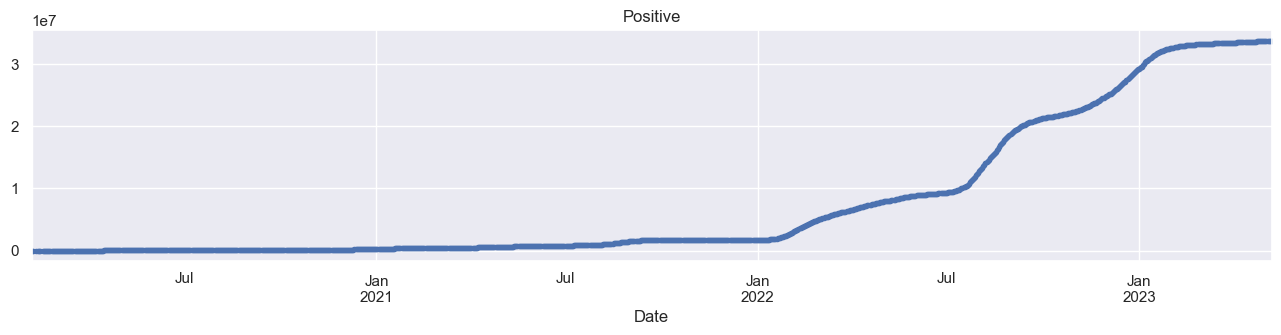

In [321]:
plot_cum("Positive")

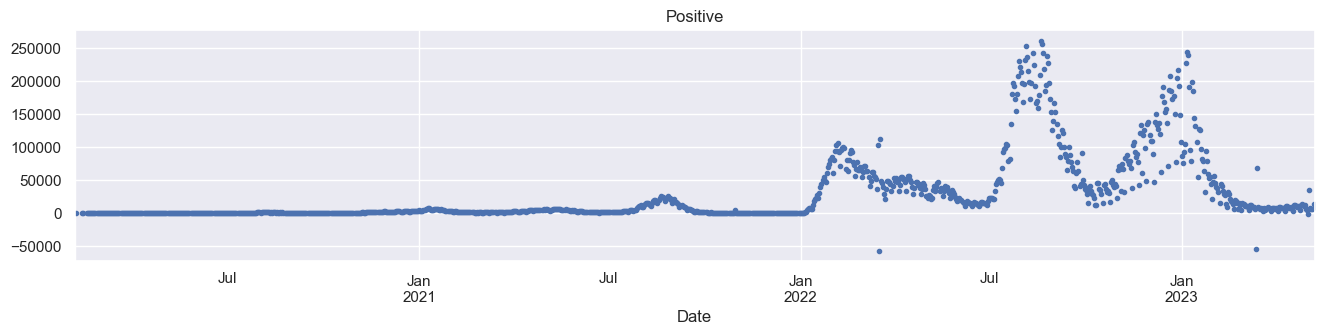

In [322]:
plot_diff("Positive")

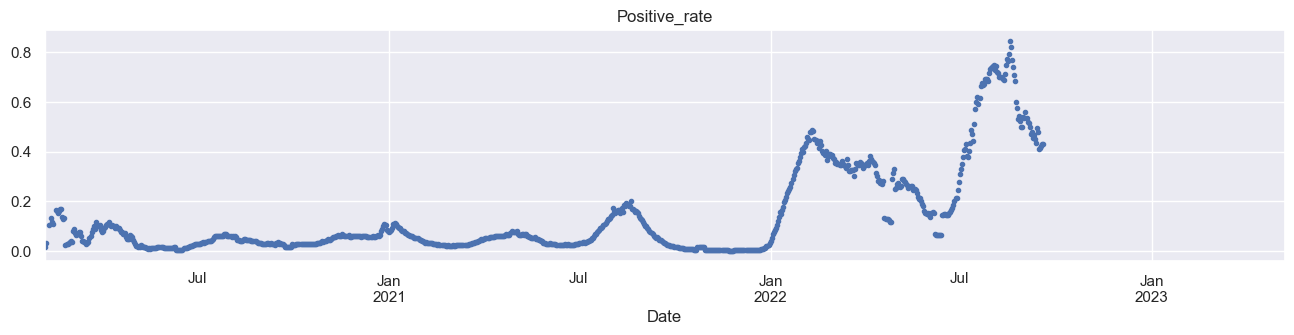

In [323]:
ts_df["Positive_rate"] = (ts_df["Positive"].diff(7) / ts_df["Tested"].diff(7)).shift(-7)
plot_cum("Positive_rate")
plt.show()

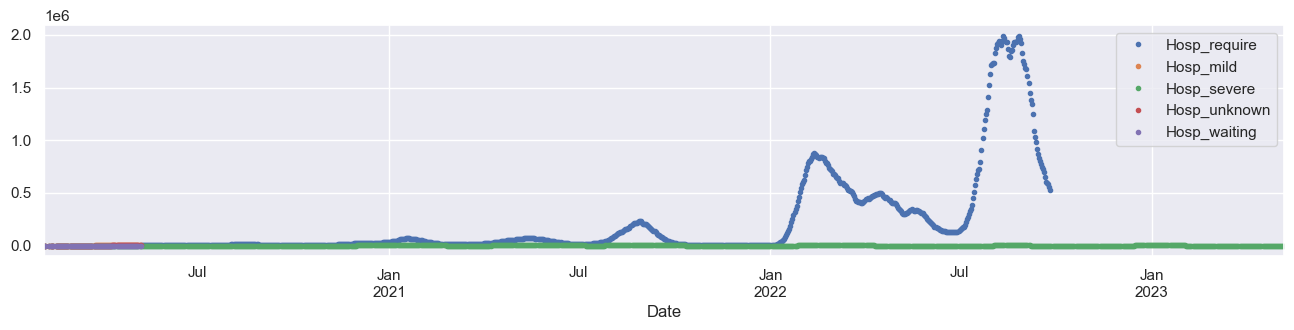

In [324]:
ts_df.loc[:, ["Hosp_require","Hosp_mild","Hosp_severe","Hosp_unknown","Hosp_waiting"]].plot(figsize=(16, 3), style=["."] * 5)
plt.show()

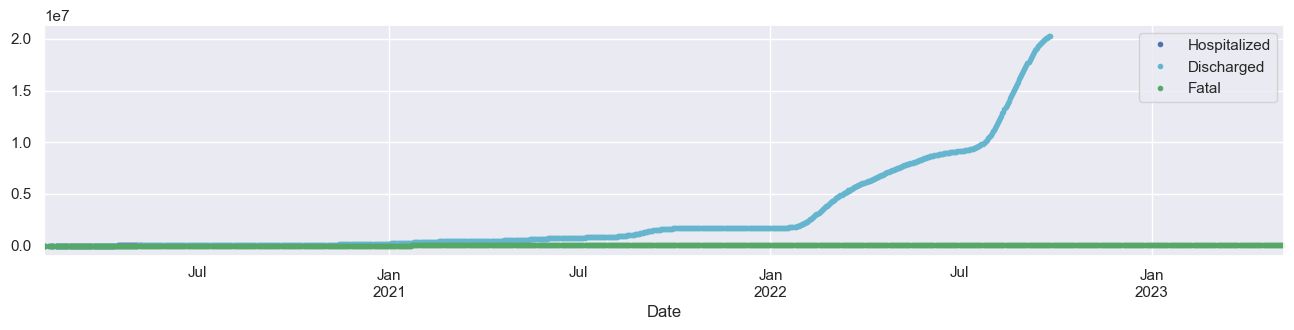

In [325]:
ts_df["Hospitalized"] = ts_df[["Hosp_mild","Hosp_severe","Hosp_unknown","Hosp_waiting"]].sum(axis=1, skipna=False)
ts_df[["Hospitalized","Discharged","Fatal"]].plot(figsize=(16, 3), style=["b.", "c.", "g.", "r."])
plt.show()

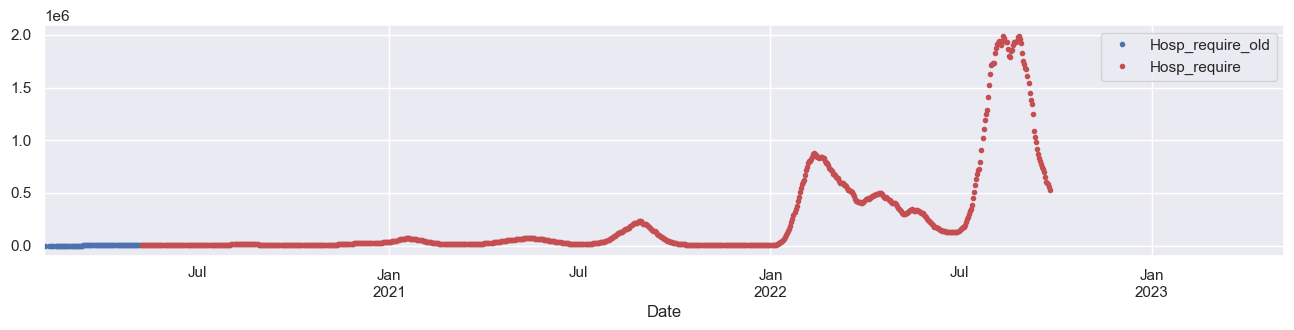

In [326]:
ts_df["Hosp_require_old"] = ts_df[["Hosp_mild","Hosp_severe","Hosp_unknown","Hosp_waiting"]].sum(axis=1, skipna=False)
ts_df[["Hosp_require_old","Hosp_require"]].plot(figsize=(16, 3), style=["b.","r."])
plt.show()

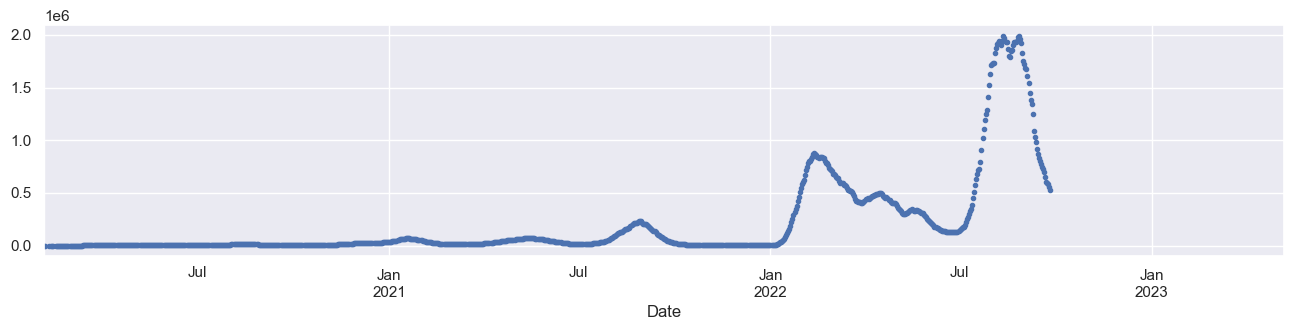

In [327]:
ts_df["Hosp_require_mod"] = ts_df["Hosp_require_old"].mask(ts_df["Hosp_require_old"].isna(), ts_df["Hosp_require"])
ts_df["Hosp_require_mod"].plot(figsize=(16, 3), style=["b."])
plt.show()

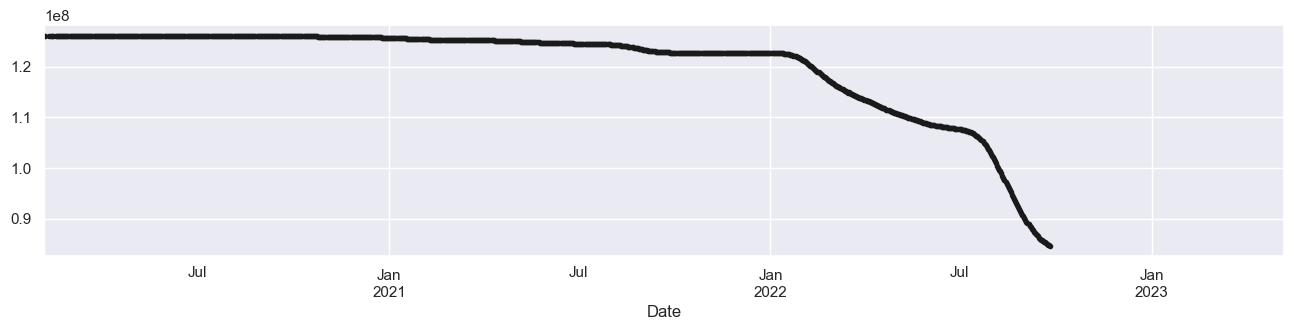

In [328]:
Total = 126166948
ts_df["Suceptible"] = Total - ts_df[["Positive","Discharged","Fatal"]].sum(axis=1, skipna=False)
ts_df["Suceptible"].plot(figsize=(16, 3), style=["k."])
plt.show()

In [329]:
N_test = 500
i_end_train = len(ts_df) - N_test
ts_stan_df = ts_df[["Suceptible","Positive","Positive_rate","Hosp_require_mod","Discharged","Fatal"]]
ts_stan_df['new_positive'] = ts_stan_df['Positive'].diff()
ts_stan_df['r'] = ts_stan_df['Discharged'] + ts_stan_df['Fatal']
ts_stan_df['new_r'] = ts_stan_df['r'].diff()
ts_stan_df['new discharged'] = ts_stan_df['Discharged'].diff()
ts_stan_df['fetal_rate'] = ts_stan_df['Fatal'].diff()
ts_stan_df = ts_stan_df.iloc[:i_end_train, :].fillna(method='ffill')
ts_stan_df = ts_stan_df.iloc[:i_end_train, :].fillna(0)



ts_stan_df = ts_stan_df.reset_index()
ts_stan_df['Date'] = ts_stan_df['Date'].apply(lambda x :str(x).split(' ')[0])
ts_stan_df['Date'] = ts_stan_df['Date'].apply(lambda x :str(x).split(' ')[0])

ts_stan_df

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_52221/1205734043.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_52221/1205734043.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_52221/1205734043.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Date,Suceptible,Positive,Positive_rate,Hosp_require_mod,Discharged,Fatal,new_positive,r,new_r,new discharged,fetal_rate
0,2020-02-06,126166919.0,25.0,0.015038,17.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
1,2020-02-07,126166919.0,25.0,0.030651,18.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
2,2020-02-08,126166919.0,25.0,0.030651,18.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
3,2020-02-09,126166919.0,25.0,0.030651,18.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
4,2020-02-10,126166913.0,26.0,0.105431,14.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
683,2021-12-20,122708289.0,1729964.0,0.005586,1502.0,1710316.0,18379.0,187.0,1728695.0,116.0,116.0,0.0
684,2021-12-21,122708044.0,1730112.0,0.005715,1566.0,1710413.0,18379.0,148.0,1728792.0,97.0,97.0,0.0
685,2021-12-22,122707651.0,1730335.0,0.005982,1617.0,1710581.0,18381.0,223.0,1728962.0,170.0,168.0,2.0
686,2021-12-23,122707286.0,1730602.0,0.006872,1748.0,1710677.0,18383.0,267.0,1729060.0,98.0,96.0,2.0


# here is for reproduction rate

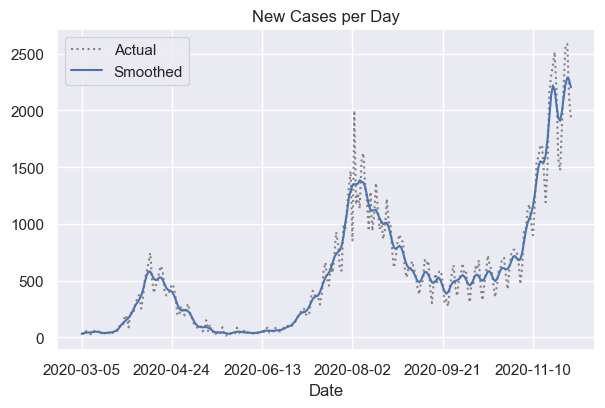

In [330]:
reproduct_df = ts_stan_df[:300].set_index('Date')

def prepare_cases(cases, cutoff=25):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()
    
    idx_start = np.searchsorted(smoothed, cutoff)
    
    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]
    
    return original, smoothed
original, smoothed = prepare_cases(reproduct_df['Positive'])

original.plot(title=f"New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)

ax.get_figure().set_facecolor('w')

In [331]:
from scipy import stats as sps
GAMMA = 1/7
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)
def get_posteriors(sr, sigma=0.15):

    # (1) Calculate Lambda
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    #prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 = np.ones_like(r_t_range)/len(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = process_matrix @ posteriors[previous_day]
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
        
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.25)


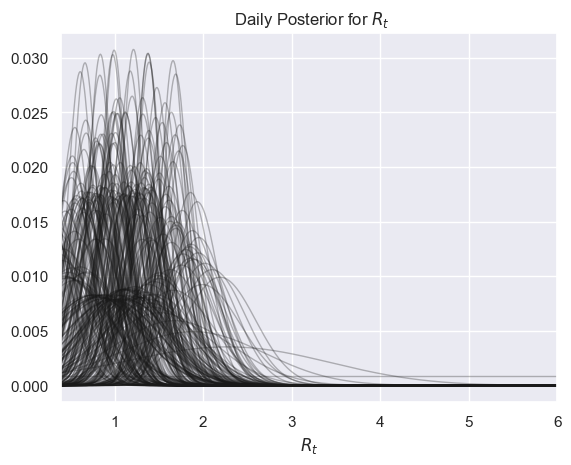

In [332]:
ax = posteriors.plot(title=f' Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0.4,6))

ax.set_xlabel('$R_t$');

In [333]:
def highest_density_interval(pmf, p=.9, debug=False):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf],
                            index=pmf.columns)

    cumsum = np.cumsum(pmf.values)
    
    # N x N matrix of total probability mass for each low, high
    total_p = cumsum - cumsum[:, None]
    
    # Return all indices with total_p > p
    lows, highs = (total_p > p).nonzero()
    
    # Find the smallest range (highest density)

    best = (highs - lows).argmin()
    
    low = pmf.index[lows[best]]
    high = pmf.index[highs[best]]
    
    return pd.Series([low, high],
                     index=[f'Low_{p*100:.0f}',
                            f'High_{p*100:.0f}'])


posteriors = posteriors.dropna(axis='columns')
# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)

result.head()

,ML,Low_90,High_90
Date,,,
2020-03-05,0.00,0.00,10.81
2020-03-06,2.28,0.36,3.88
2020-03-07,1.89,0.46,3.07
2020-03-08,1.68,0.49,2.68
2020-03-09,1.51,0.44,2.40


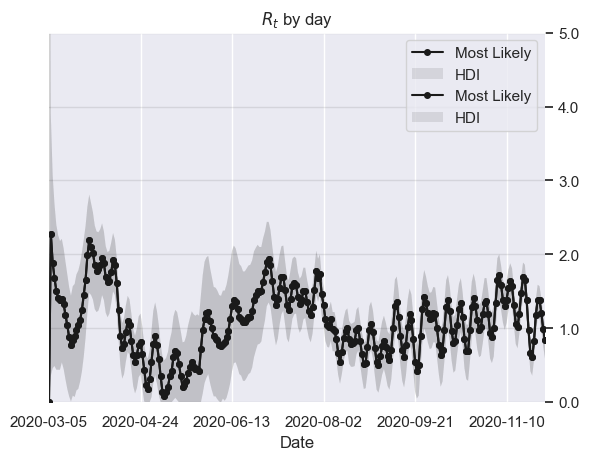

In [334]:
hdi = highest_density_interval(posteriors, debug=True)

most_likely_values = posteriors.idxmax(axis=0)
ax = most_likely_values.plot(marker='o',
                             label='Most Likely',
                             title=f'$R_t$ by day',
                             c='k',
                             markersize=4)

ax.fill_between(hdi.index,
                hdi['Low_90'],
                hdi['High_90'],
                color='k',
                alpha=.1,
                lw=0,
                label='HDI')

from matplotlib import dates as mdates
from matplotlib import ticker
hdi = highest_density_interval(posteriors, debug=True)

most_likely_values = posteriors.idxmax(axis=0)
ax = most_likely_values.plot(marker='o',
                             label='Most Likely',
                             title=f'$R_t$ by day',
                             c='k',
                             markersize=4)

ax.fill_between(hdi.index,
                hdi['Low_90'],
                hdi['High_90'],
                color='k',
                alpha=.1,
                lw=0,
                label='HDI')


ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0)
ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
ax.margins(0)
ax.set_ylim(0.0, 5.0)


ax.legend();
ax.legend();

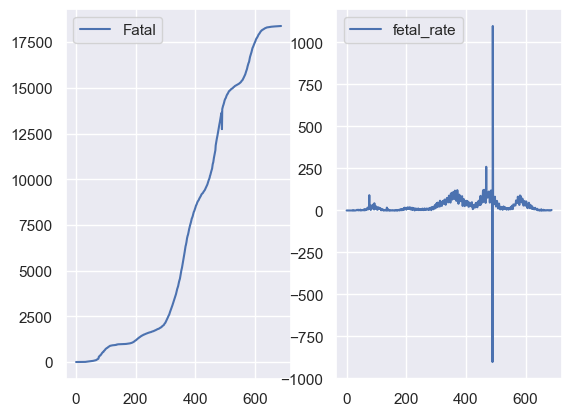

In [335]:
plt.subplot(1, 2, 1)
plt.plot(list(range(len(ts_stan_df))),ts_stan_df['Fatal'],label = 'Fatal')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(list(range(len(ts_stan_df))),ts_stan_df['fetal_rate'],label = 'fetal_rate')
plt.legend()
plt.show()


In [336]:
# time for fisrt spread
# time of each wave
# 150:220 , 300:400 , 400:500 
dates = ts_stan_df['Date'].tolist()
date2idx = {date:i for i,date in enumerate(dates)} 
start = date2idx["2020-02-06"]
emergency_start = date2idx["2020-04-07"]
emergency_stop = date2idx["2020-05-25"]
end = date2idx["2020-06-30"]
dates_n = [i for i,_ in enumerate(ts_stan_df['Date'].tolist())] 

In [337]:
numpy_data=ts_stan_df[['Date','Suceptible','Discharged','Fatal','new_positive','Positive','r','new_r','new discharged']]
time = ts_stan_df['Date']
t = list(range(len(time)))

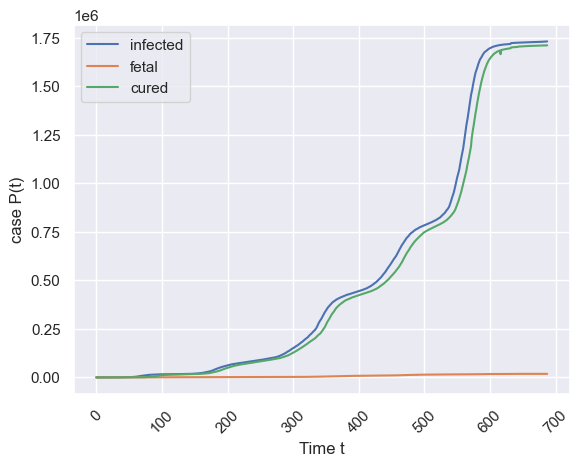

In [338]:
plt.xlabel("Time t")
plt.ylabel("case P(t)")
plt.xticks(rotation=45)
N = numpy_data['Suceptible'][0]
infect = numpy_data['Positive'] 
Fatal = numpy_data['Fatal'] 
Discharged = numpy_data['Discharged'] 

plt.plot(dates_n, infect, label= 'infected')
plt.plot(dates_n, Fatal,  label= 'fetal')
plt.plot(dates_n, Discharged,  label= 'cured')
plt.legend()

plt.show()

In [339]:
def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2):
    dS = -(beta1 * y[1] + beta2 * y[2]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    return [dS, dE, dI, dR]

# Define the parameters
def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2):
    return integrate.odeint(seir_model, (S0, E0, I0, R0), x, args=(beta1, beta2, sigma, gamma1, gamma2))[:, 2]

N = 125800000.0
I0 = numpy_data['Positive'][start:end][0]
S0 = N - I0
R0 = 0.0
E0 = 0.0

#here we use data before 
popt, pcov = optimize.curve_fit(fit_odeint, dates_n[start:emergency_start], numpy_data['new_positive'][start:emergency_start])  

/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



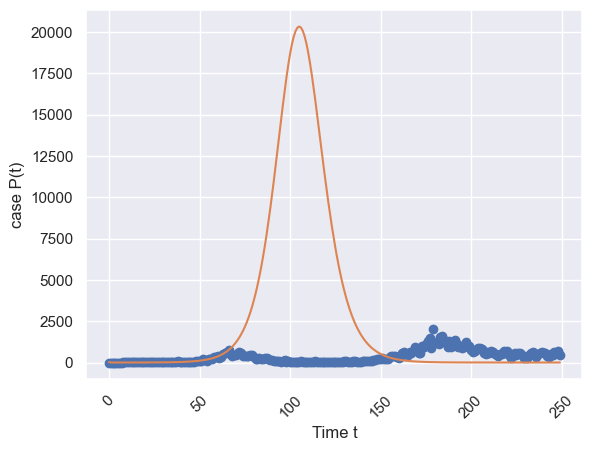

In [340]:
# the measure was not taken , then first spread could be skyrocket and result in big casualty

fitted = fit_odeint(dates_n[:250], *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("case P(t)")
plt.xticks(rotation=45)

plt.plot(dates_n[:250], numpy_data['new_positive'][:250], 'o')

plt.plot(dates_n[:250], fitted)

plt.show()

In [341]:
numpy_data['Positive'][emergency_start:end][emergency_start]


3906.0

In [342]:
test = numpy_data[['Suceptible','new_positive','new discharged']]
test = test.to_numpy()
test=test[:,:]
y_0=test[start,:].tolist()
y_0


[126166919.0, 0.0, 0.0]

In [343]:
# i tried to calibrate with multiple columns here 

def deriv_sir(y, t, n, beta, gamma):
    s, i, r = y
    dsdt = -beta * s * i / n
    didt = beta * s * i / n - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt

N = y_0[0]
I0 = 5
S0 = N - I0
R0 = 0.0
E0 = 0.0 


t= dates_n
def gen_compute_sir(S0, I0, R0, n):
    def compute_sir(t, beta, gamma):
        init = (S0, I0, R0)
        pop = n
        res = integrate.odeint(deriv_sir, init, t, args=(pop,beta, gamma))
        return res.flatten()
    return compute_sir
    
fx = gen_compute_sir(S0, I0, R0, N)
popt, pcov = optimize.curve_fit(fx, t, test[:,:].flatten())
beta, gamma = popt
t= dates_n[:]
fitted = integrate.odeint(deriv_sir, (S0, I0, R0), t, args=(N, beta, gamma))


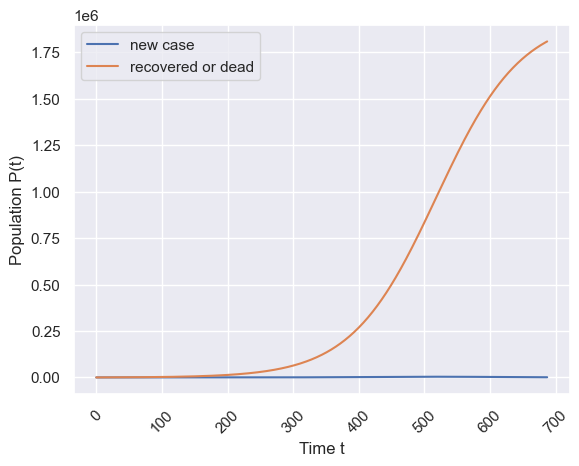

In [344]:

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)


plt.plot(t, fitted[:,1],label='new case')

plt.plot(t, fitted[:,2],label='recovered or dead')



plt.legend()
plt.show()

In [345]:
# i tried to calibrate with multiple columns here 

def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2):
    dS = -(beta1 * y[1] + beta2 * y[2]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    return [dS, dE, dI, dR]
    
def deriv_sir(y, t, n, beta,gamma1 , gamma2):
    s, i, r ,e= y
    dsdt = -beta * s * i / n
    dedt = beta * s * i / n - (gamma1 + gamma2) * e
    didt = gamma2 * e - beta * i
    drdt = gamma1 * e + beta * i
    return dsdt, didt, drdt , dedt

N = y_0[0]
I0 = 25
S0 = N - I0
R0 = 0.0
E0 = 0.0 

t= dates_n[emergency_start:end]
def gen_compute_sir(S0, I0, R0,E0, n):
    def compute_sir(t, beta, gamma):
        init = (S0, I0, R0,E0)
        pop = n
        res = integrate.odeint(deriv_sir, init, t, args=(pop,beta, gamma1,gamma2))
        return res[:,:3].flatten()
    return compute_sir
    
fx = gen_compute_sir(S0, I0, R0,E0, N)
popt, pcov = optimize.curve_fit(fx, t, test[emergency_start:end,:].flatten())
beta, gamma = popt
t= dates_n[start:end]
fitted = integrate.odeint(deriv_sir, (S0, I0, R0,E0), t, args=(N, beta , gamma1,gamma2))


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning:

Covariance of the parameters could not be estimated



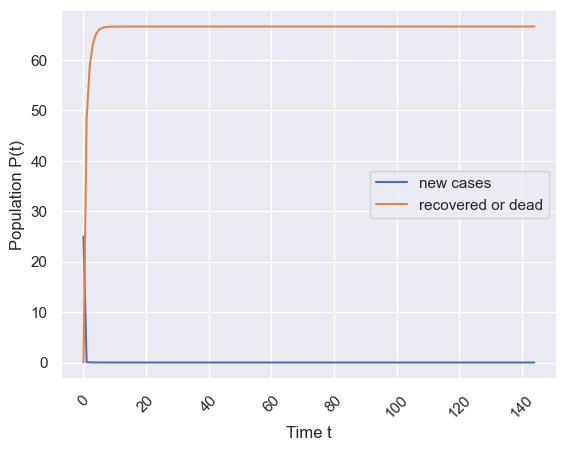

In [346]:

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)



plt.plot(t, fitted[:,1],label='new cases')

plt.plot(t, fitted[:,2],label='recovered or dead')

plt.legend()
plt.show()

From here it is part for vaccination 

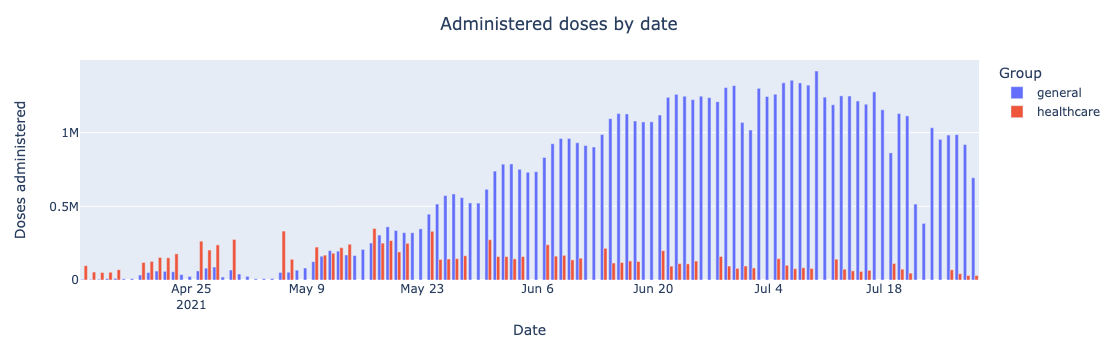

In [347]:
import pandas as pd
import plotly.express as px

df_healthcare_by_date = pd.read_csv('/Users/mac/Desktop/archive/Vaccination of the healthcare by date.csv') 
df_healthcare_by_date['Date'] = pd.to_datetime(df_healthcare_by_date['Date'])
df_healthcare_by_date['Group'] = 'healthcare'

df_general_by_date = pd.read_csv('/Users/mac/Desktop/archive/Vaccination of the general public by date.csv') 
df_general_by_date['Date'] = pd.to_datetime(df_general_by_date['Date'])
df_general_by_date['Group'] = 'general'

# create dataframe copies for plotting cumulative data later
df_general_by_date_copy = df_general_by_date.copy()
df_general_by_date_copy.columns = ['Date', 'Total doses(general)', 'First dose(general)', 'Second dose(general)', 'First dose(general with Pfizer)','First dose(elderly with Moderna)','Second dose(elderly with Pfizer)','Second dose(elderly with Moderna)','Group']
df_healthcare_by_date_copy = df_healthcare_by_date.copy()
df_healthcare_by_date_copy.columns = ['Date', 'Total doses(healthcare)', 'First dose(healthcare)', 'Second dose(healthcare)', 'First dose(healthcare with Pfizer)','First dose(healthcare with Moderna)','Second dose(healthcare with Pfizer)','Second dose(healthcare with Moderna)','Group']

# plot the daily vaccinated population
df_by_date = pd.concat([df_healthcare_by_date,df_general_by_date])
df_by_date = df_by_date.sort_values(by='Date',ascending=True)

fig = px.bar(df_by_date, x='Date', y='Total doses', color='Group', barmode='group')
fig.update_layout(title_text='Administered doses by date', title_x=0.5)
fig.update_layout(
    yaxis_title="Doses administered"  
)
fig.show()

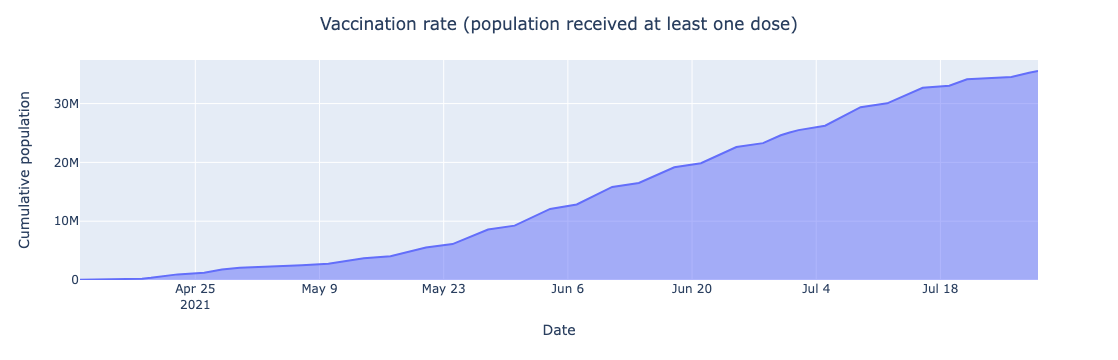

In [348]:
# combine the healthcare workers and general public data, calculate cumulative sum of the vaccinated (at least one dose)

df_by_date_copy = pd.merge(df_healthcare_by_date_copy, df_general_by_date_copy, on='Date')
df_by_date_copy = df_by_date_copy.sort_values(by='Date',ascending=True)
df_by_date_copy['first_dose_sum_by_date'] = df_by_date_copy['First dose(healthcare)'] + df_by_date_copy['First dose(general)']
df_by_date_copy['first_dose_cum_sum'] = df_by_date_copy['first_dose_sum_by_date'].cumsum()
fig = px.area(df_by_date_copy, x='Date', y='first_dose_cum_sum')
fig.update_layout(title_text='Vaccination rate (population received at least one dose)', title_x=0.5)
fig.update_layout(
    yaxis_title='Cumulative population'  
)
fig.show()

In [349]:
df_by_date_copy['first_dose_cum_sum'][len(df_by_date_copy)-1]

31494

In [350]:
#r0 , rt , accurary of calibration (r-square) , vaccination and quaratine rate 

In [351]:
newly_confirmed_cases_daily[newly_confirmed_cases_daily['Date']=='2020/4/12']
newly_confirmed_cases_daily[newly_confirmed_cases_daily['Date']=='2020/7/29']


,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
195,2020/7/29,1254,5,0,2,4,0,0,1,9,...,0,0,100,3,3,21,0,19,3,42


In [352]:
ts_stan_df

,Date,Suceptible,Positive,Positive_rate,Hosp_require_mod,Discharged,Fatal,new_positive,r,new_r,new discharged,fetal_rate
0,2020-02-06,126166919.0,25.0,0.015038,17.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
1,2020-02-07,126166919.0,25.0,0.030651,18.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
2,2020-02-08,126166919.0,25.0,0.030651,18.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
3,2020-02-09,126166919.0,25.0,0.030651,18.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
4,2020-02-10,126166913.0,26.0,0.105431,14.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
683,2021-12-20,122708289.0,1729964.0,0.005586,1502.0,1710316.0,18379.0,187.0,1728695.0,116.0,116.0,0.0
684,2021-12-21,122708044.0,1730112.0,0.005715,1566.0,1710413.0,18379.0,148.0,1728792.0,97.0,97.0,0.0
685,2021-12-22,122707651.0,1730335.0,0.005982,1617.0,1710581.0,18381.0,223.0,1728962.0,170.0,168.0,2.0
686,2021-12-23,122707286.0,1730602.0,0.006872,1748.0,1710677.0,18383.0,267.0,1729060.0,98.0,96.0,2.0


In [353]:

vaccine_df = ts_stan_df[(ts_stan_df['Date'] >= '2021-04-12') & (ts_stan_df['Date'] <= '2021-06-01')]
vaccine_df


,Date,Suceptible,Positive,Positive_rate,Hosp_require_mod,Discharged,Fatal,new_positive,r,new_r,new discharged,fetal_rate
431,2021-04-12,125185346.0,506286.0,0.059813,30467.0,465916.0,9400.0,2883.0,475316.0,2209.0,2191.0,18.0
432,2021-04-13,125179951.0,508802.0,0.059634,30038.0,468770.0,9425.0,2516.0,478195.0,2879.0,2854.0,25.0
433,2021-04-14,125174303.0,512169.0,0.060643,31073.0,471007.0,9469.0,3367.0,480476.0,2281.0,2237.0,44.0
434,2021-04-15,125167757.0,516121.0,0.059777,32347.0,473570.0,9500.0,3952.0,483070.0,2594.0,2563.0,31.0
435,2021-04-16,125160911.0,520745.0,0.060043,34689.0,475754.0,9538.0,4624.0,485292.0,2222.0,2184.0,38.0
436,2021-04-17,125153768.0,525218.0,0.059728,36649.0,478378.0,9584.0,4473.0,487962.0,2670.0,2624.0,46.0
437,2021-04-18,125146704.0,529829.0,0.059877,38759.0,480793.0,9622.0,4611.0,490415.0,2453.0,2415.0,38.0
438,2021-04-19,125140203.0,534052.0,0.060183,40588.0,483052.0,9641.0,4223.0,492693.0,2278.0,2259.0,19.0
439,2021-04-20,125133884.0,537317.0,0.062129,40867.0,486076.0,9671.0,3265.0,495747.0,3054.0,3024.0,30.0
440,2021-04-21,125126798.0,541496.0,0.061592,42054.0,488944.0,9710.0,4179.0,498654.0,2907.0,2868.0,39.0


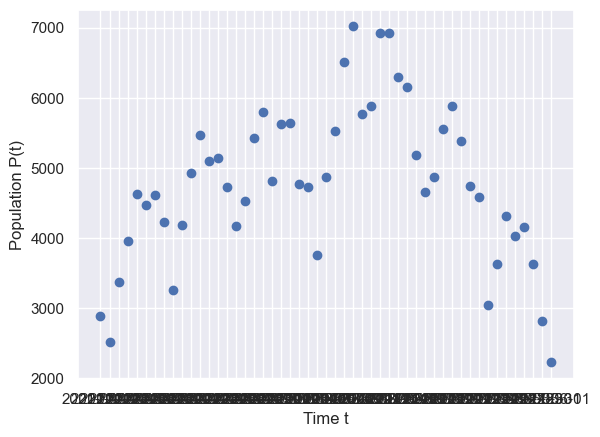

In [354]:

plt.xlabel("Time t")
plt.ylabel("Population P(t)")

plt.plot(vaccine_df['Date'].tolist(), vaccine_df['new_positive'].tolist(), 'o')

plt.show()

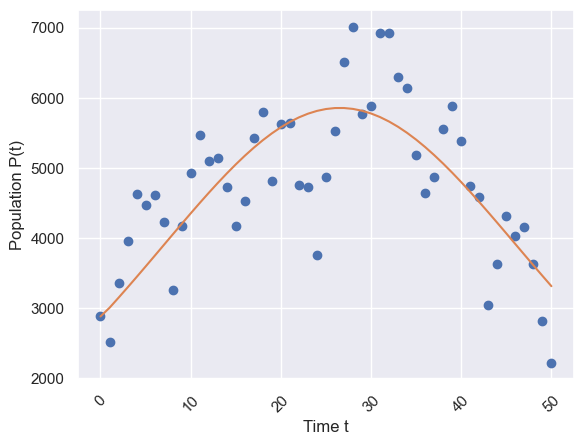

In [356]:
dates_n = [i for i,_ in enumerate(vaccine_df['Date'].tolist())] 
def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2):
    dS = -(beta1 * y[1] + beta2 * y[2]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    return [dS, dE, dI, dR]
def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2):
    return integrate.odeint(seir_model, (S0, E0, I0, R0), x, args=(beta1, beta2, sigma, gamma1, gamma2))[:, 2]

N = 125800000.0
I0 = vaccine_df['new_positive'].tolist()[0]
S0 = N - I0
R0 = 0.0
E0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, dates_n, vaccine_df['new_positive'])
fitted = fit_odeint(dates_n, *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)


plt.plot(dates_n, vaccine_df['new_positive'], 'o')
plt.plot(dates_n, fitted)


plt.show()

In [286]:
from sklearn.metrics import r2_score
r2_score(vaccine_df['new_positive'], fitted)

-1.5737897783195254

/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.



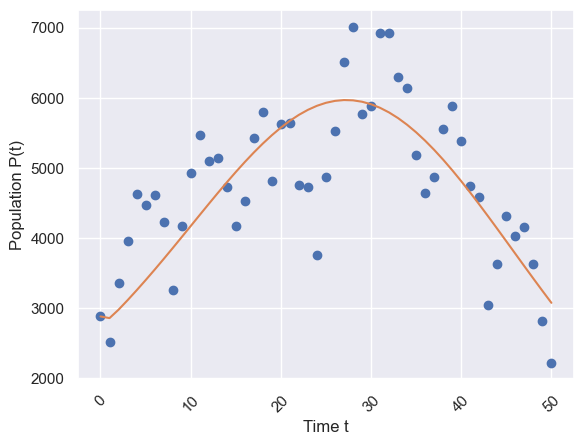

In [287]:
# with vaccine rate
dates_n = [i for i,_ in enumerate(vaccine_df['Date'].tolist())] 
def seir_model(y, t, beta1, beta2, sigma, gamma1, gamma2, vac_rate):
    dS = -(beta1 * y[1] + beta2 * y[2] + y[4]) * (y[0] / N)
    dE = (beta1 * y[1] + beta2 * y[2]) * (y[0] / N) - (sigma + gamma1) * y[1]
    dI = sigma * y[1] - gamma2 * y[2]
    dR = gamma1 * y[1] + gamma2 * y[2]
    dV = y[0] * vac_rate
    return [dS, dE, dI, dR,dV]
def fit_odeint(x, beta1, beta2, sigma, gamma1, gamma2, vac_rate):
    return integrate.odeint(seir_model, (S0, E0, I0, R0, V0), x, args=(beta1, beta2, sigma, gamma1, gamma2,vac_rate))[:, 2]

N = 125800000.0 
I0 = vaccine_df['new_positive'].tolist()[0]
V0 = df_by_date_copy['first_dose_cum_sum'][len(df_by_date_copy)-1]
S0 = N - I0 - V0

R0 = 0.0
E0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, dates_n, vaccine_df['new_positive'])
fitted = fit_odeint(dates_n, *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("Population P(t)")
plt.xticks(rotation=45)


plt.plot(dates_n, vaccine_df['new_positive'], 'o')
plt.plot(dates_n, fitted)


plt.show()

In [288]:

r2_score(vaccine_df['new_positive'], fitted)

0.5611648354292036

In [289]:
1 * 1.31429237e-03

0.00131429237

In [290]:
# vaccine rate = 1.31429237e-03
# by reducing rate to see difference 
fitted1 = fit_odeint(dates_n, *popt)
popt[5] = 0.71429237e-03 - 0.0002

fitted2 = fit_odeint(dates_n, *popt)
popt[5] = 0.71429237e-03 - 0.0002- 0.0002

fitted3 = fit_odeint(dates_n, *popt)
popt[5] = 0.71429237e-03 - 0.0002- 0.0002- 0.0002

fitted4 = fit_odeint(dates_n, *popt)
popt[5] = 0.71429237e-03 - 0.0002- 0.0002- 0.0002- 0.0002

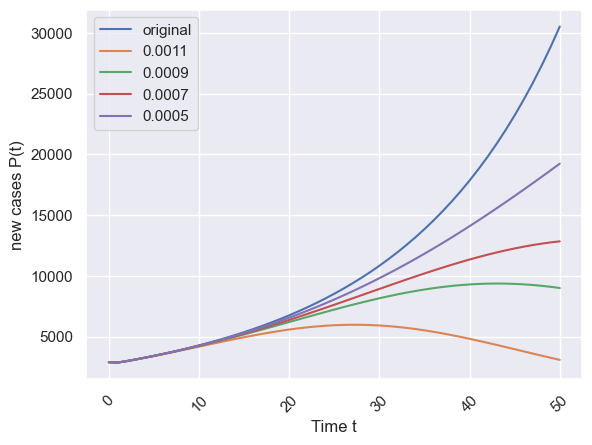

-82.897937471746

In [291]:

fitted = fit_odeint(dates_n, *popt)

sns.set()
plt.xlabel("Time t")
plt.ylabel("new cases P(t)")
plt.xticks(rotation=45)


plt.plot(dates_n, fitted,label = 'original')
plt.plot(dates_n, fitted1,label = '0.0011')
plt.plot(dates_n, fitted2,label = '0.0009')
plt.plot(dates_n, fitted3,label = '0.0007')
plt.plot(dates_n, fitted4,label = '0.0005')

plt.legend()

plt.show()
r2_score(vaccine_df['new_positive'], fitted)

In [292]:
vaccine_df['Date'] = vaccine_df['Date'].apply(lambda x: str(x))
vaccine_df = vaccine_df.set_index('Date')

/var/folders/6m/1kyq0wq56bx12x382j8hdw1h0000gq/T/ipykernel_52221/522158214.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



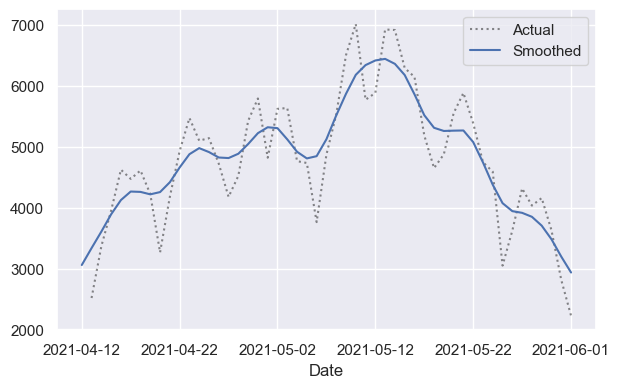

In [293]:
def prepare_cases(cases, cutoff=25):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()
    
    idx_start = np.searchsorted(smoothed, cutoff)
    
    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]
    
    return original, smoothed



original, smoothed = prepare_cases(vaccine_df['Positive'])

original.plot(
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)

ax.get_figure().set_facecolor('w')

In [294]:
from scipy import stats as sps
GAMMA = 1/7
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)
def get_posteriors(sr, sigma=0.15):

    # (1) Calculate Lambda
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    #prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 = np.ones_like(r_t_range)/len(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = process_matrix @ posteriors[previous_day]
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
        
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.25)

posteriors

Date,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,...,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01
0.00,0.000833,7.224697e-38,5.622046e-45,7.944327e-47,5.126895e-43,3.080229e-35,2.384553e-24,7.219970e-21,5.668971e-25,1.243855e-34,...,2.206783e-09,0.000001,3.997846e-07,1.146610e-12,1.437637e-18,2.184844e-17,6.713771e-13,1.631504e-08,0.000023,0.000085
0.01,0.000833,1.968761e-37,1.914657e-44,2.907393e-46,1.842187e-42,9.983091e-35,6.301386e-24,1.758120e-20,1.512191e-24,4.049487e-34,...,3.988459e-09,0.000002,6.320117e-07,2.196646e-12,3.215986e-18,4.731027e-17,1.275484e-12,2.644049e-08,0.000033,0.000114
0.02,0.000833,5.330350e-37,6.473858e-44,1.055823e-45,6.564912e-42,3.207583e-34,1.650386e-23,4.243126e-20,3.998209e-24,1.306646e-33,...,7.134006e-09,0.000003,9.900539e-07,4.172314e-12,7.134336e-18,1.015983e-16,2.403426e-12,4.251211e-08,0.000045,0.000150
0.03,0.000833,1.433874e-36,2.173236e-43,3.804657e-45,2.320254e-41,1.021685e-33,4.284010e-23,1.014947e-19,1.047793e-23,4.178674e-33,...,1.262813e-08,0.000005,1.536818e-06,7.857093e-12,1.569507e-17,2.163763e-16,4.491893e-12,6.781308e-08,0.000062,0.000198
0.04,0.000833,3.832327e-36,7.243003e-43,1.360419e-44,8.132972e-41,3.226100e-33,1.102113e-22,2.406111e-19,2.721653e-23,1.324455e-32,...,2.212158e-08,0.000007,2.363800e-06,1.466933e-11,3.424039e-17,4.570046e-16,8.326581e-12,1.073169e-07,0.000084,0.000258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.96,0.000833,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
11.97,0.000833,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
11.98,0.000833,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
11.99,0.000833,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000


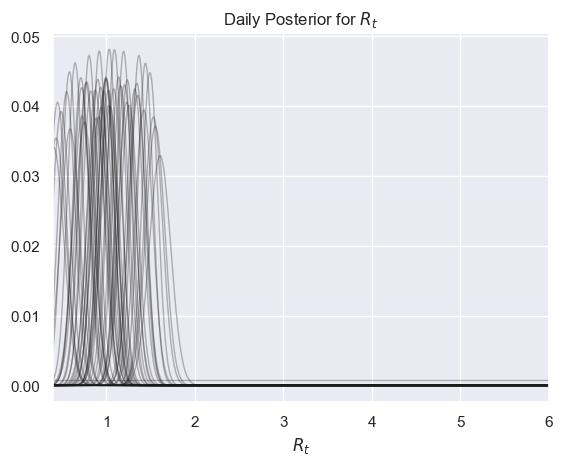

In [295]:
ax = posteriors.plot(title=f'Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0.4,6))

ax.set_xlabel('$R_t$');

In [296]:


# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)

result.head()

,ML,Low_90,High_90
Date,,,
2021-04-12,0.00,0.00,10.81
2021-04-13,1.61,1.40,1.80
2021-04-14,1.56,1.35,1.71
2021-04-15,1.53,1.33,1.68
2021-04-16,1.43,1.23,1.57


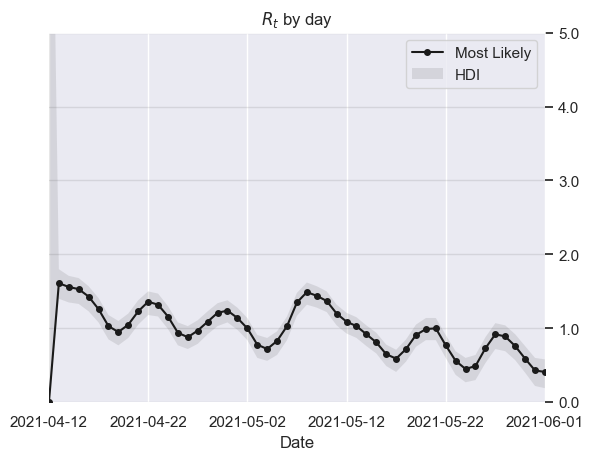

In [297]:
from matplotlib import dates as mdates
from matplotlib import ticker
hdi = highest_density_interval(posteriors, debug=True)

most_likely_values = posteriors.idxmax(axis=0)
ax = most_likely_values.plot(marker='o',
                             label='Most Likely',
                             title=f'$R_t$ by day',
                             c='k',
                             markersize=4)

ax.fill_between(hdi.index,
                hdi['Low_90'],
                hdi['High_90'],
                color='k',
                alpha=.1,
                lw=0,
                label='HDI')


ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax.yaxis.tick_right()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0)
ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
ax.margins(0)
ax.set_ylim(0.0, 5.0)


ax.legend();